In [0]:
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim 
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
import torchvision 
import torchvision.transforms as tfs

import numpy as np

import matplotlib.pyplot as plt

from tqdm import trange

In [0]:
size_ = 32
batch_size = 48
lr = 1e-4

In [0]:
translist = []

translist.append(tfs.RandomApply([tfs.RandomAffine(30, scale=(0.8, 1.2), shear=(-10, 10))], p=0.3))
translist.append(tfs.RandomApply([tfs.RandomHorizontalFlip(1.0)], p=0.8))
translist.append(tfs.RandomApply([tfs.RandomRotation(40)], p=0.8))
translist.append(tfs.RandomApply([tfs.ColorJitter(0.3, 0.3, 0.3)], p=0.8))
translist.append(tfs.RandomApply([tfs.Grayscale(num_output_channels=3)], p=0.8))


random_transform = tfs.Compose([tfs.RandomChoice(translist), tfs.RandomChoice(translist), tfs.RandomChoice(translist), tfs.RandomChoice(translist),
                                tfs.ToTensor(), tfs.Normalize((10.0, 10.0, 10.0), (5.0, 5.0, 5.0))])
normal_transform = tfs.Compose([tfs.ToTensor(), tfs.Normalize((10.0, 10.0, 10.0), (5.0, 5.0, 5.0))])

In [0]:
data = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=normal_transform)
rand_data = torchvision.datasets.STL10(root='./data', split='train', download=True, transform=random_transform)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
class DataCaller(Dataset):
  
  def __init__(self, data, rand_data):
    super(DataCaller, self).__init__()
    self._data = data
    self._rand_data = rand_data
  

  def __len__(self):
    return len(self._data)

  def __getitem__(self, idx):
    x, y = self._data[idx]
    x_, y_ = self._rand_data[idx]
    return x, x_, y, y_

In [0]:
print(len(data))
dataset = DataCaller(data, rand_data)
print(dataset.__len__())
print(len(rand_data))
dataloader = DataLoader(dataset, batch_size = batch_size, shuffle=True)

5000
5000
5000


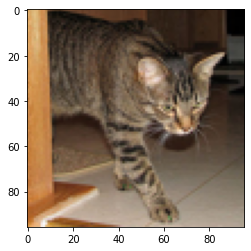

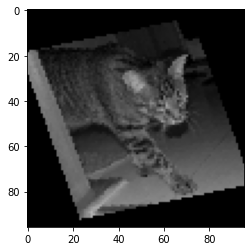

torch.Size([3, 96, 96])
tensor([3, 5, 5, 4, 5, 0, 2, 7, 6, 5, 1, 8, 3, 7, 2, 4, 3, 8, 1, 7, 1, 2, 2, 8,
        9, 3, 3, 5, 8, 1, 2, 6, 4, 6, 8, 5, 3, 8, 7, 3, 0, 3, 9, 1, 1, 3, 4, 6])
tensor([3, 5, 5, 4, 5, 0, 2, 7, 6, 5, 1, 8, 3, 7, 2, 4, 3, 8, 1, 7, 1, 2, 2, 8,
        9, 3, 3, 5, 8, 1, 2, 6, 4, 6, 8, 5, 3, 8, 7, 3, 0, 3, 9, 1, 1, 3, 4, 6])


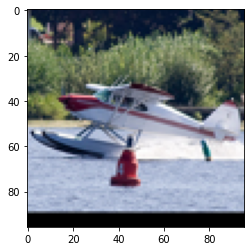

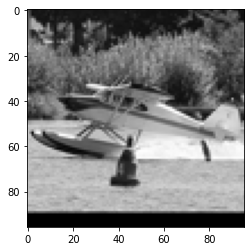

torch.Size([3, 96, 96])
tensor([0, 5, 8, 1, 1, 8, 5, 8, 7, 8, 1, 5, 8, 2, 3, 9, 2, 4, 2, 6, 8, 6, 6, 1,
        5, 4, 1, 1, 5, 6, 0, 7, 3, 9, 8, 6, 6, 4, 2, 1, 4, 1, 1, 4, 5, 6, 0, 0])
tensor([0, 5, 8, 1, 1, 8, 5, 8, 7, 8, 1, 5, 8, 2, 3, 9, 2, 4, 2, 6, 8, 6, 6, 1,
        5, 4, 1, 1, 5, 6, 0, 7, 3, 9, 8, 6, 6, 4, 2, 1, 4, 1, 1, 4, 5, 6, 0, 0])


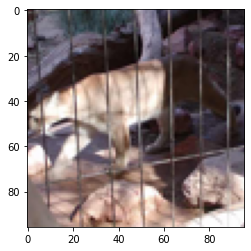

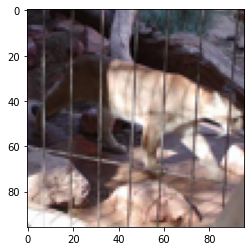

torch.Size([3, 96, 96])
tensor([3, 7, 6, 0, 1, 8, 4, 3, 4, 8, 6, 7, 5, 2, 6, 2, 1, 7, 9, 3, 6, 3, 8, 3,
        5, 2, 7, 6, 1, 3, 6, 4, 2, 1, 4, 8, 0, 0, 7, 3, 2, 9, 5, 9, 0, 1, 2, 2])
tensor([3, 7, 6, 0, 1, 8, 4, 3, 4, 8, 6, 7, 5, 2, 6, 2, 1, 7, 9, 3, 6, 3, 8, 3,
        5, 2, 7, 6, 1, 3, 6, 4, 2, 1, 4, 8, 0, 0, 7, 3, 2, 9, 5, 9, 0, 1, 2, 2])


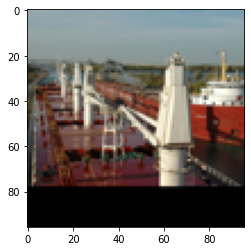

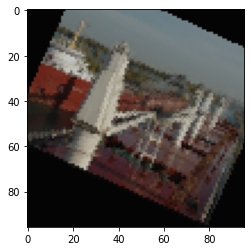

torch.Size([3, 96, 96])
tensor([8, 0, 2, 9, 3, 9, 6, 1, 4, 1, 2, 5, 0, 4, 0, 4, 1, 0, 8, 0, 9, 4, 4, 5,
        1, 6, 4, 8, 0, 7, 3, 0, 0, 3, 0, 7, 6, 1, 2, 3, 4, 5, 5, 2, 3, 1, 6, 5])
tensor([8, 0, 2, 9, 3, 9, 6, 1, 4, 1, 2, 5, 0, 4, 0, 4, 1, 0, 8, 0, 9, 4, 4, 5,
        1, 6, 4, 8, 0, 7, 3, 0, 0, 3, 0, 7, 6, 1, 2, 3, 4, 5, 5, 2, 3, 1, 6, 5])


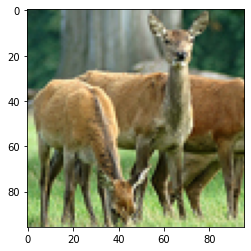

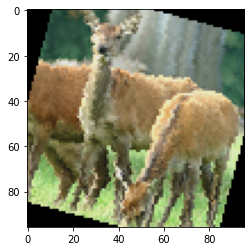

torch.Size([3, 96, 96])
tensor([4, 1, 5, 6, 7, 3, 4, 5, 0, 2, 9, 1, 0, 9, 2, 0, 6, 6, 9, 6, 3, 2, 0, 2,
        2, 5, 0, 4, 7, 1, 7, 3, 2, 9, 3, 2, 8, 6, 4, 0, 0, 7, 6, 6, 5, 8, 4, 6])
tensor([4, 1, 5, 6, 7, 3, 4, 5, 0, 2, 9, 1, 0, 9, 2, 0, 6, 6, 9, 6, 3, 2, 0, 2,
        2, 5, 0, 4, 7, 1, 7, 3, 2, 9, 3, 2, 8, 6, 4, 0, 0, 7, 6, 6, 5, 8, 4, 6])


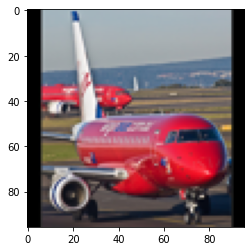

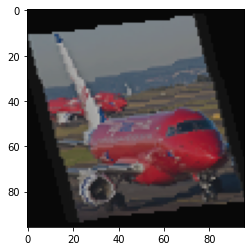

torch.Size([3, 96, 96])
tensor([0, 6, 4, 9, 0, 9, 9, 1, 1, 3, 9, 4, 6, 9, 9, 5, 0, 9, 5, 6, 5, 6, 6, 6,
        5, 0, 0, 5, 1, 3, 2, 2, 7, 0, 9, 9, 6, 9, 2, 1, 9, 2, 2, 3, 8, 7, 1, 0])
tensor([0, 6, 4, 9, 0, 9, 9, 1, 1, 3, 9, 4, 6, 9, 9, 5, 0, 9, 5, 6, 5, 6, 6, 6,
        5, 0, 0, 5, 1, 3, 2, 2, 7, 0, 9, 9, 6, 9, 2, 1, 9, 2, 2, 3, 8, 7, 1, 0])


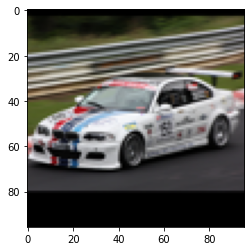

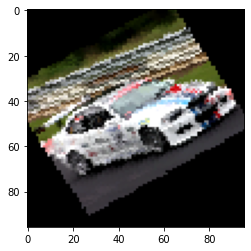

torch.Size([3, 96, 96])
tensor([2, 9, 7, 4, 5, 9, 5, 8, 8, 4, 0, 2, 1, 7, 4, 7, 5, 2, 7, 8, 5, 7, 2, 5,
        7, 9, 8, 2, 4, 6, 3, 8, 4, 2, 8, 5, 4, 0, 6, 0, 9, 5, 5, 9, 5, 9, 6, 1])
tensor([2, 9, 7, 4, 5, 9, 5, 8, 8, 4, 0, 2, 1, 7, 4, 7, 5, 2, 7, 8, 5, 7, 2, 5,
        7, 9, 8, 2, 4, 6, 3, 8, 4, 2, 8, 5, 4, 0, 6, 0, 9, 5, 5, 9, 5, 9, 6, 1])


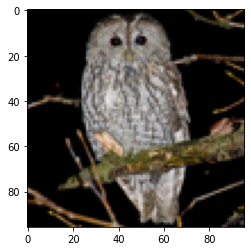

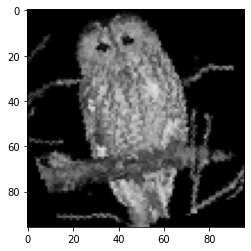

torch.Size([3, 96, 96])
tensor([1, 9, 7, 2, 9, 8, 3, 7, 7, 7, 2, 0, 6, 3, 4, 6, 5, 7, 0, 1, 3, 6, 6, 4,
        9, 9, 1, 4, 9, 2, 5, 5, 3, 8, 2, 7, 8, 8, 9, 8, 1, 9, 0, 4, 4, 2, 2, 0])
tensor([1, 9, 7, 2, 9, 8, 3, 7, 7, 7, 2, 0, 6, 3, 4, 6, 5, 7, 0, 1, 3, 6, 6, 4,
        9, 9, 1, 4, 9, 2, 5, 5, 3, 8, 2, 7, 8, 8, 9, 8, 1, 9, 0, 4, 4, 2, 2, 0])


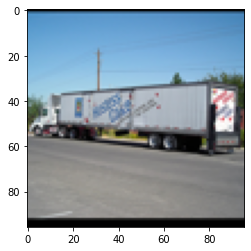

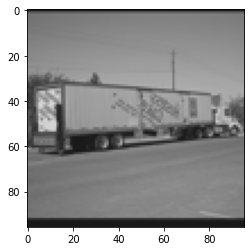

torch.Size([3, 96, 96])
tensor([9, 2, 6, 1, 9, 8, 6, 8, 5, 8, 6, 1, 1, 8, 9, 5, 1, 5, 5, 8, 1, 6, 4, 6,
        4, 0, 9, 2, 6, 7, 1, 4, 8, 7, 4, 3, 2, 8, 1, 9, 6, 1, 7, 2, 1, 0, 0, 7])
tensor([9, 2, 6, 1, 9, 8, 6, 8, 5, 8, 6, 1, 1, 8, 9, 5, 1, 5, 5, 8, 1, 6, 4, 6,
        4, 0, 9, 2, 6, 7, 1, 4, 8, 7, 4, 3, 2, 8, 1, 9, 6, 1, 7, 2, 1, 0, 0, 7])


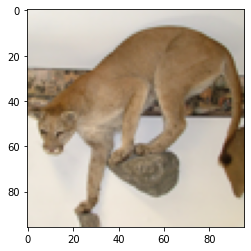

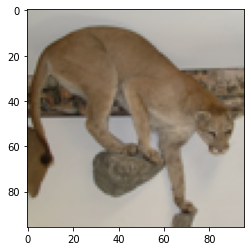

torch.Size([3, 96, 96])
tensor([3, 6, 5, 5, 6, 8, 5, 9, 3, 1, 7, 5, 5, 8, 3, 8, 2, 2, 5, 7, 1, 2, 3, 4,
        0, 1, 2, 8, 4, 5, 6, 9, 5, 8, 2, 9, 6, 0, 1, 4, 5, 5, 2, 9, 8, 6, 8, 1])
tensor([3, 6, 5, 5, 6, 8, 5, 9, 3, 1, 7, 5, 5, 8, 3, 8, 2, 2, 5, 7, 1, 2, 3, 4,
        0, 1, 2, 8, 4, 5, 6, 9, 5, 8, 2, 9, 6, 0, 1, 4, 5, 5, 2, 9, 8, 6, 8, 1])


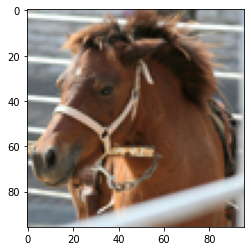

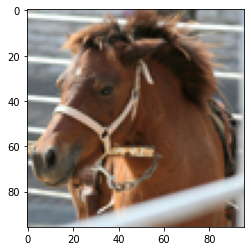

torch.Size([3, 96, 96])
tensor([6, 2, 5, 9, 3, 0, 3, 4, 8, 8, 5, 6, 1, 6, 1, 2, 7, 9, 6, 1, 3, 6, 5, 3,
        2, 1, 2, 6, 6, 0, 0, 4, 2, 5, 0, 2, 8, 0, 9, 7, 8, 6, 3, 7, 4, 7, 3, 3])
tensor([6, 2, 5, 9, 3, 0, 3, 4, 8, 8, 5, 6, 1, 6, 1, 2, 7, 9, 6, 1, 3, 6, 5, 3,
        2, 1, 2, 6, 6, 0, 0, 4, 2, 5, 0, 2, 8, 0, 9, 7, 8, 6, 3, 7, 4, 7, 3, 3])


In [0]:
def imshow(img):
    img = img * 5 + 10     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

for step, data in enumerate(dataloader):
  x, x_, y, y_, = data
  imshow(x[0])
  imshow(x_[0])
  print(x[0].shape)
  print(y)
  print(y_)
  if step==10:
    break

In [0]:
class Net(nn.Module):

  def __init__(self, output_size, overcluster_size):
    super(Net, self).__init__()

    self._output_size = output_size
    self._overcluster_size = overcluster_size

    self._cnn = nn.Sequential(
        nn.BatchNorm2d(3),
        nn.Conv2d(3, 16, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        #16 x 48 x 48

        nn.BatchNorm2d(16),
        nn.Conv2d(16, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(32, 32, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        #32 x 24 x 24

        nn.BatchNorm2d(32),
        nn.Conv2d(32, 48, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(48, 48, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        #64 x 12 x 12

        nn.BatchNorm2d(48),
        nn.Conv2d(48, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(64, 64, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2),
        #96 x 6 x 6

        nn.BatchNorm2d(64),
        nn.Conv2d(64, 128, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(128, 128 ,kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2, 2)
        #128 x 3 x 3
    )
    self._fcc = nn.Sequential(
        nn.Linear(1152, 512),
        nn.Dropout(0.4),
        nn.ReLU(),
        nn.Linear(512, 64),
        nn.Dropout(0.4),
        nn.ReLU(),
        nn.Linear(64, self._output_size)
    )
    self._fcc_overcluster = nn.Sequential(
        nn.Linear(1152, 512),
        nn.Dropout(0.4),
        nn.ReLU(),
        nn.Linear(512, 64),
        nn.Dropout(0.4),
        nn.ReLU(),
        nn.Linear(64, self._overcluster_size)
    )

  def forward(self, x):
    feature = self._cnn(x)
    feature = feature.view(feature.size(0), -1)
    output = self._fcc(feature)
    output = F.softmax(output, dim=1)

    overcluster_output = self._fcc_overcluster(feature)
    overcluster_output = F.softmax(overcluster_output, dim=1)
    return output, overcluster_output

In [0]:
def init_weights(m):
  if type(m) == nn.Linear:
    nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
    m.bias.data.fill_(1e-3)
  elif type(m) == nn.Conv2d:
    nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
    m.bias.data.fill_(1e-3)


In [0]:
EPS = 1e-20
def IIC(z, zt, C=10):
  P = (z.unsqueeze(2) * zt.unsqueeze(1)).sum(dim=0) 
  P = ((P + P.t()) / 2) / P.sum()
  P[(P < EPS).data] = EPS
  Pi = P.sum(dim=1).view(C, 1).expand(C, C)
  Pj = P.sum(dim=0).view(1, C).expand(C, C)
  return (P * (torch.log(Pi) + torch.log(Pj) - torch.log(P))).sum()
  #equals to - mutual information
  #since we want to maximize mutual information, it is sufficient to minimize the result of this function(thus apply gradient descent)

In [0]:
def train(net, dataloader, epochs, lr, device):
  net.to(device)
  optimizer = optim.Adam(net.parameters(), lr=lr)

  net.train()
  for epoch in trange(epochs):
    losses = []
    for step, data in enumerate(dataloader):
      x, x_, _, _, = data
      x = x.to(device)
      x_ = x_.to(device)

      z, z_over  = net(x)
      z_, z_over_ = net(x_)

      #if torch.all(torch.eq(x, x_)):
      #  print('input error')
      #if torch.all(torch.eq(z, z)):
      #  print('output error')
      if step==0:
        imshow(x[0].to('cpu'))
        imshow(x_[0].to('cpu'))
        print(z[0])
        print(z_[0])

      if step%5==0:
        loss = IIC(z, z_, C=10)
      else:
        loss = IIC(z_over, z_over_, C=50)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      losses.append(loss.item())

    avg_loss = sum(losses) / len(losses)
    print(f'epoch {epoch} finished ======> average loss : {avg_loss}')
    PATH = f'checkpoint{epoch}.pt'
    torch.save(net.state_dict(), PATH) 







  0%|          | 0/1000 [00:00<?, ?it/s]

cuda
Net(
  (_cnn): Sequential(
    (0): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Conv2d(32, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU()
    (13): Conv2d(48, 48, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU()
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mo

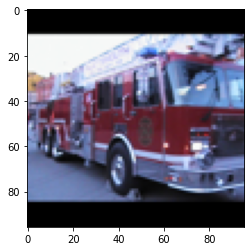

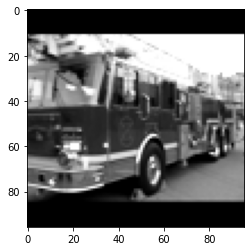

tensor([1.0089e-06, 1.5807e-03, 1.3644e-04, 3.5560e-06, 2.0234e-02, 8.3472e-01,
        1.1096e-01, 2.7411e-04, 2.8074e-02, 4.0231e-03], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.2924e-06, 7.5278e-06, 5.8036e-04, 3.6302e-03, 8.0730e-01, 1.5269e-01,
        7.0303e-06, 2.1905e-02, 4.3683e-04, 1.3445e-02], device='cuda:0',
       grad_fn=<SelectBackward>)








  0%|          | 1/1000 [00:12<3:24:44, 12.30s/it]

epoch 0 finished ======> average loss : -0.16576980732026556


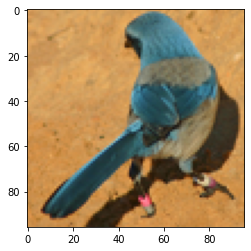

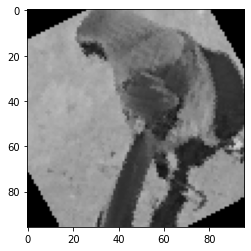

tensor([1.4421e-04, 9.8159e-03, 3.9725e-02, 1.5898e-01, 1.2350e-03, 5.8375e-01,
        1.2954e-04, 3.6363e-02, 8.1824e-03, 1.6168e-01], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([0.0024, 0.2130, 0.0345, 0.0849, 0.0307, 0.2262, 0.0048, 0.3857, 0.0029,
        0.0150], device='cuda:0', grad_fn=<SelectBackward>)








  0%|          | 2/1000 [00:24<3:25:16, 12.34s/it]

epoch 1 finished ======> average loss : -0.18337024499972662


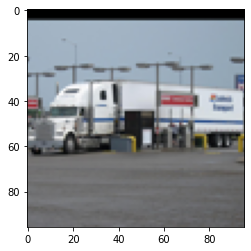

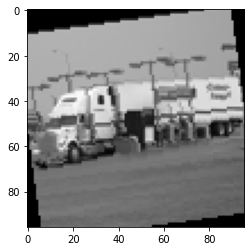

tensor([3.6062e-03, 4.4767e-02, 1.9463e-02, 2.4677e-02, 4.4009e-05, 8.8447e-01,
        8.8021e-05, 7.8546e-03, 1.4789e-02, 2.4397e-04], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([0.0019, 0.0020, 0.0446, 0.0479, 0.0095, 0.5412, 0.0115, 0.0040, 0.3281,
        0.0093], device='cuda:0', grad_fn=<SelectBackward>)








  0%|          | 3/1000 [00:37<3:24:41, 12.32s/it]

epoch 2 finished ======> average loss : -0.20399361621765863


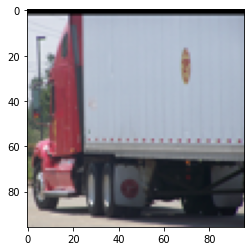

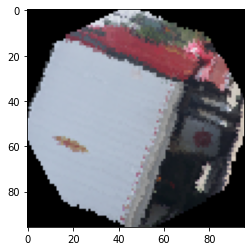

tensor([3.0891e-04, 2.1606e-04, 1.3212e-01, 1.2623e-02, 9.0553e-03, 1.6516e-02,
        1.2166e-04, 4.8810e-02, 5.9308e-01, 1.8714e-01], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.9325e-03, 2.1524e-03, 1.2636e-05, 1.6667e-03, 4.0301e-03, 3.8298e-01,
        3.6487e-04, 3.3179e-02, 1.5303e-03, 5.7215e-01], device='cuda:0',
       grad_fn=<SelectBackward>)








  0%|          | 4/1000 [00:49<3:24:10, 12.30s/it]

epoch 3 finished ======> average loss : -0.2351310847947995


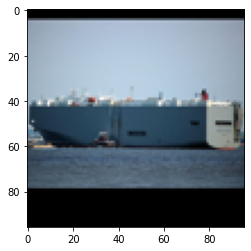

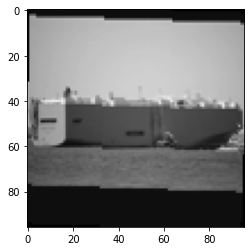

tensor([6.6837e-06, 2.4639e-04, 3.6428e-04, 1.1483e-02, 5.5445e-05, 4.0445e-01,
        3.3827e-06, 1.2279e-01, 1.3863e-03, 4.5921e-01], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.3400e-02, 2.6349e-03, 7.4412e-02, 1.9181e-03, 7.4769e-01, 5.6016e-03,
        6.8097e-03, 5.2423e-04, 9.8046e-03, 1.3720e-01], device='cuda:0',
       grad_fn=<SelectBackward>)








  0%|          | 5/1000 [01:01<3:23:17, 12.26s/it]

epoch 4 finished ======> average loss : -0.25995270116698177


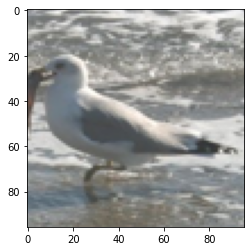

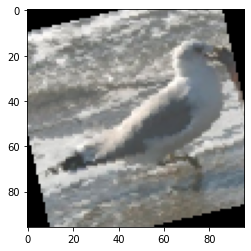

tensor([2.6840e-03, 1.6927e-03, 8.0442e-04, 1.5379e-02, 1.5868e-03, 7.3137e-01,
        4.1787e-04, 1.0583e-01, 8.6739e-02, 5.3491e-02], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([3.0983e-05, 8.4839e-04, 3.9681e-03, 1.9603e-01, 1.6529e-03, 2.0871e-01,
        4.8079e-03, 4.6630e-04, 5.8153e-01, 1.9527e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  1%|          | 6/1000 [01:13<3:22:45, 12.24s/it]

epoch 5 finished ======> average loss : -0.2930637857743672


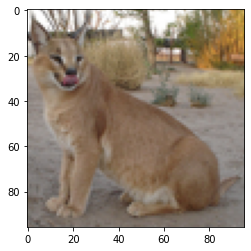

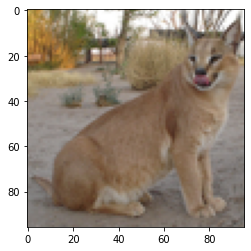

tensor([1.4893e-03, 6.7362e-02, 4.1493e-01, 9.6045e-03, 7.9016e-05, 1.5907e-01,
        6.2340e-02, 9.2271e-02, 1.9250e-01, 3.4215e-04], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([2.8196e-04, 7.5080e-03, 6.6019e-03, 9.4248e-02, 8.2103e-03, 2.3886e-04,
        4.3228e-03, 2.4018e-01, 6.3735e-01, 1.0622e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  1%|          | 7/1000 [01:25<3:22:31, 12.24s/it]

epoch 6 finished ======> average loss : -0.32349116152950697


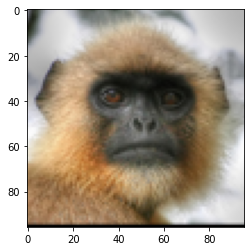

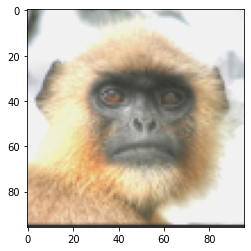

tensor([0.0456, 0.2882, 0.0437, 0.0808, 0.0271, 0.3551, 0.0256, 0.0956, 0.0121,
        0.0263], device='cuda:0', grad_fn=<SelectBackward>)
tensor([1.7788e-05, 1.7298e-03, 4.3694e-02, 9.4418e-01, 1.7007e-03, 1.7084e-04,
        1.0065e-03, 1.0994e-03, 6.3960e-03, 2.0817e-06], device='cuda:0',
       grad_fn=<SelectBackward>)








  1%|          | 8/1000 [01:38<3:21:59, 12.22s/it]

epoch 7 finished ======> average loss : -0.35113190703448793


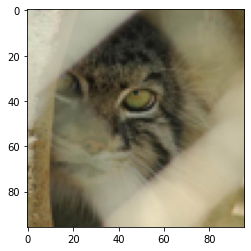

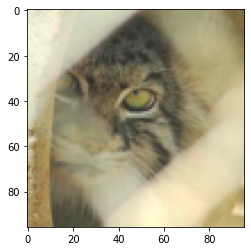

tensor([0.0060, 0.0138, 0.2205, 0.0102, 0.1424, 0.0119, 0.5235, 0.0039, 0.0507,
        0.0170], device='cuda:0', grad_fn=<SelectBackward>)
tensor([0.0013, 0.0184, 0.0132, 0.0169, 0.0493, 0.3899, 0.0036, 0.4508, 0.0218,
        0.0347], device='cuda:0', grad_fn=<SelectBackward>)








  1%|          | 9/1000 [01:50<3:21:55, 12.23s/it]

epoch 8 finished ======> average loss : -0.39199190451985316


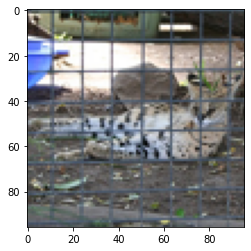

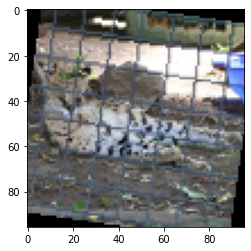

tensor([4.4647e-04, 8.7787e-04, 7.6774e-03, 3.4227e-03, 3.1709e-03, 2.3881e-01,
        2.8578e-02, 2.0550e-05, 5.7172e-01, 1.4527e-01], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([6.5802e-04, 6.2270e-03, 2.3008e-01, 6.5454e-01, 5.0730e-04, 3.9779e-02,
        1.3970e-02, 1.9766e-03, 4.7172e-02, 5.0896e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  1%|          | 10/1000 [02:02<3:21:31, 12.21s/it]

epoch 9 finished ======> average loss : -0.42962347992828914


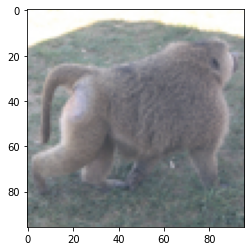

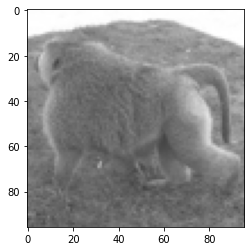

tensor([5.4320e-04, 2.6210e-03, 1.8087e-02, 9.9979e-03, 3.2710e-02, 8.5044e-01,
        1.1964e-03, 3.5722e-03, 7.6671e-02, 4.1663e-03], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([0.0004, 0.0172, 0.0108, 0.2862, 0.1969, 0.3226, 0.0126, 0.0751, 0.0761,
        0.0022], device='cuda:0', grad_fn=<SelectBackward>)








  1%|          | 11/1000 [02:14<3:20:48, 12.18s/it]

epoch 10 finished ======> average loss : -0.46432215298215546


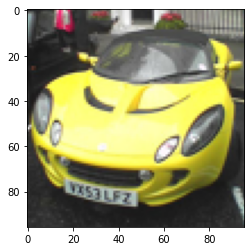

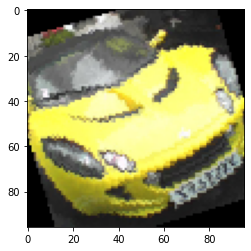

tensor([1.8072e-05, 1.8187e-08, 3.7898e-04, 1.2742e-04, 2.8048e-05, 2.4940e-02,
        6.1016e-07, 2.8834e-06, 9.7450e-01, 9.5803e-08], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([9.7294e-05, 3.6528e-03, 7.3124e-01, 2.4735e-04, 3.9658e-05, 1.0786e-02,
        2.1519e-06, 2.6377e-03, 2.5129e-01, 3.5379e-07], device='cuda:0',
       grad_fn=<SelectBackward>)








  1%|          | 12/1000 [02:26<3:19:55, 12.14s/it]

epoch 11 finished ======> average loss : -0.5057091540169149


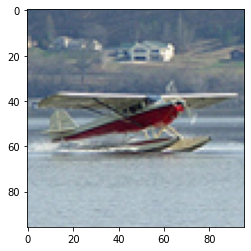

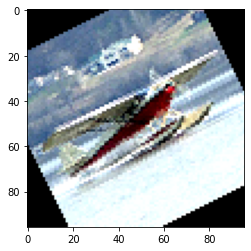

tensor([0.0006, 0.3019, 0.0714, 0.0045, 0.0067, 0.2747, 0.1109, 0.0325, 0.1942,
        0.0026], device='cuda:0', grad_fn=<SelectBackward>)
tensor([1.0432e-07, 5.8320e-03, 1.1459e-04, 1.3051e-01, 5.4505e-04, 2.1038e-03,
        4.2413e-08, 8.5888e-01, 2.0123e-03, 3.7342e-07], device='cuda:0',
       grad_fn=<SelectBackward>)








  1%|▏         | 13/1000 [02:38<3:19:28, 12.13s/it]

epoch 12 finished ======> average loss : -0.5375531127410276


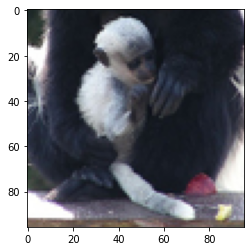

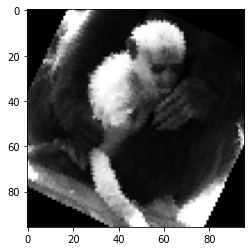

tensor([9.0291e-03, 5.5592e-04, 9.7110e-01, 4.0493e-04, 3.0381e-05, 6.3808e-03,
        4.3483e-04, 6.6256e-04, 1.0761e-02, 6.4551e-04], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.0046e-04, 4.8548e-02, 1.5748e-02, 4.8532e-04, 7.3235e-06, 7.1626e-01,
        1.4927e-03, 2.1492e-01, 1.1270e-04, 2.3270e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  1%|▏         | 14/1000 [02:50<3:19:43, 12.15s/it]

epoch 13 finished ======> average loss : -0.5704088517242953


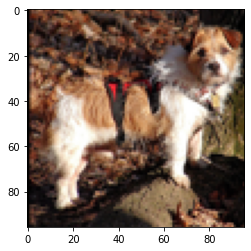

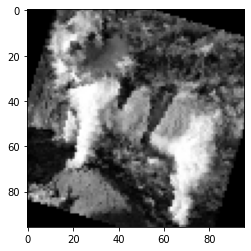

tensor([9.6075e-03, 1.9747e-02, 2.4293e-01, 5.7236e-03, 1.4602e-05, 4.1443e-01,
        9.8140e-05, 4.7105e-02, 2.1307e-01, 4.7269e-02], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([5.8228e-05, 1.9861e-06, 7.5147e-04, 1.3481e-04, 2.3357e-02, 2.6797e-02,
        1.1903e-03, 1.2532e-04, 9.4531e-01, 2.2776e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 15/1000 [03:03<3:19:31, 12.15s/it]

epoch 14 finished ======> average loss : -0.6180987473045076


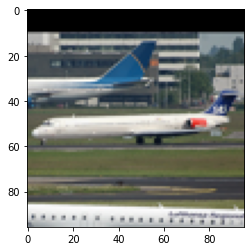

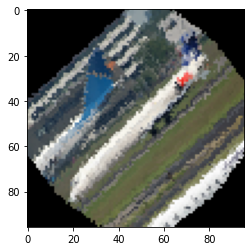

tensor([4.1415e-04, 9.1127e-05, 1.1458e-03, 7.5355e-03, 1.9025e-02, 7.9843e-01,
        3.3590e-06, 1.4056e-01, 2.6288e-02, 6.5112e-03], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([5.7528e-04, 1.0077e-05, 1.2944e-03, 8.5057e-04, 1.1702e-03, 6.5310e-02,
        7.6043e-03, 4.1575e-04, 9.2271e-01, 5.7864e-05], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 16/1000 [03:15<3:19:12, 12.15s/it]

epoch 15 finished ======> average loss : -0.6583881631493569


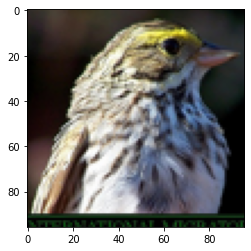

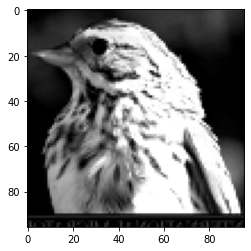

tensor([9.6374e-02, 3.9394e-04, 9.8456e-03, 6.1196e-03, 5.7587e-04, 8.3576e-01,
        2.2255e-07, 4.6477e-02, 1.0483e-03, 3.4018e-03], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([7.5400e-06, 4.3892e-01, 1.6684e-05, 2.9662e-03, 2.4120e-07, 5.5055e-01,
        2.4320e-03, 3.5768e-03, 4.9843e-05, 1.4732e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 17/1000 [03:27<3:18:34, 12.12s/it]

epoch 16 finished ======> average loss : -0.6898790301311584


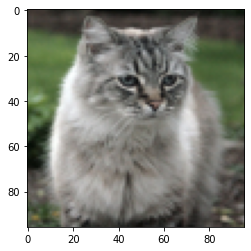

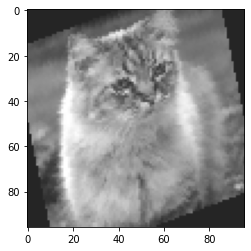

tensor([2.9997e-03, 8.2304e-01, 2.6598e-04, 2.4796e-04, 3.1091e-03, 4.0685e-02,
        3.0417e-02, 5.9749e-02, 2.6219e-04, 3.9222e-02], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([5.6112e-05, 4.8150e-02, 3.0700e-01, 2.9689e-01, 3.6075e-03, 4.5278e-02,
        1.0422e-03, 2.0071e-01, 5.5669e-03, 9.1703e-02], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 18/1000 [03:39<3:18:20, 12.12s/it]

epoch 17 finished ======> average loss : -0.7205635356761161


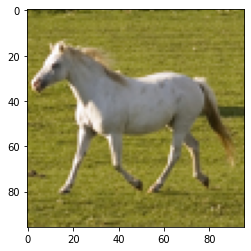

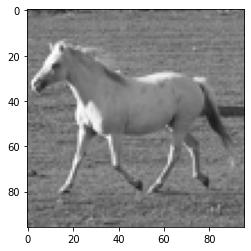

tensor([6.4746e-04, 3.2802e-02, 4.6216e-02, 7.9395e-02, 3.5641e-03, 1.9128e-01,
        1.9693e-02, 1.1296e-01, 5.1322e-01, 2.1930e-04], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([0.0018, 0.0159, 0.0320, 0.1829, 0.0856, 0.5444, 0.0026, 0.0400, 0.0608,
        0.0341], device='cuda:0', grad_fn=<SelectBackward>)








  2%|▏         | 19/1000 [03:51<3:17:56, 12.11s/it]

epoch 18 finished ======> average loss : -0.7551693566143513


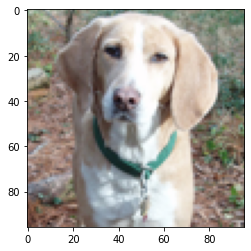

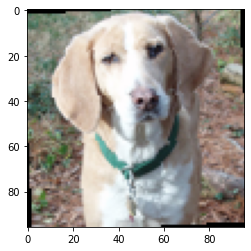

tensor([0.0066, 0.1196, 0.2824, 0.0237, 0.0089, 0.0153, 0.0065, 0.2072, 0.2782,
        0.0517], device='cuda:0', grad_fn=<SelectBackward>)
tensor([9.5727e-04, 7.5195e-02, 5.5667e-03, 2.4406e-04, 2.5322e-02, 1.9161e-04,
        1.4978e-01, 3.8684e-01, 3.4839e-01, 7.5081e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 20/1000 [04:03<3:17:54, 12.12s/it]

epoch 19 finished ======> average loss : -0.7818127072992779


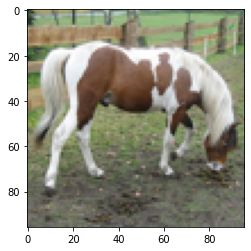

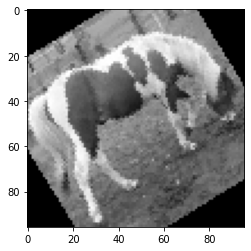

tensor([0.0089, 0.0013, 0.0218, 0.1180, 0.6737, 0.0026, 0.0009, 0.0007, 0.0022,
        0.1699], device='cuda:0', grad_fn=<SelectBackward>)
tensor([1.3411e-05, 2.7598e-02, 1.3239e-01, 1.1667e-01, 1.5736e-02, 8.5380e-02,
        5.7978e-01, 6.3149e-03, 3.5853e-02, 2.7026e-04], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 21/1000 [04:15<3:17:33, 12.11s/it]

epoch 20 finished ======> average loss : -0.8001127897983505


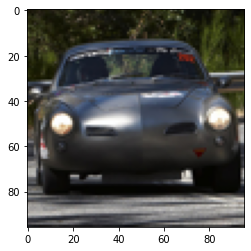

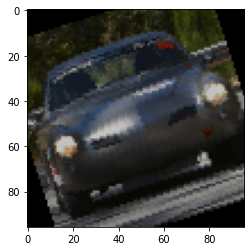

tensor([1.0007e-03, 7.7073e-01, 1.2781e-01, 4.4642e-03, 3.1170e-05, 7.6110e-02,
        1.4324e-02, 4.6474e-03, 6.8286e-04, 2.0148e-04], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([5.6968e-05, 5.2779e-05, 2.2016e-03, 1.7007e-04, 3.0704e-04, 9.6969e-02,
        1.6655e-05, 3.0219e-03, 3.8763e-01, 5.0958e-01], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 22/1000 [04:27<3:16:32, 12.06s/it]

epoch 21 finished ======> average loss : -0.840243875412714


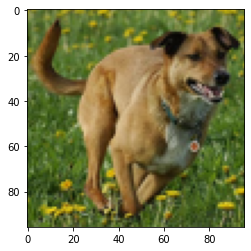

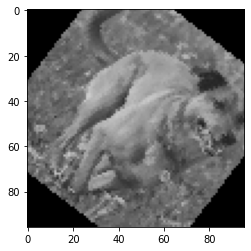

tensor([6.2489e-04, 2.9687e-01, 5.7432e-05, 5.8367e-05, 1.1577e-01, 3.5945e-01,
        6.8725e-03, 2.1896e-01, 1.0630e-03, 2.6889e-04], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.6829e-04, 4.2713e-03, 1.7546e-05, 7.1539e-04, 5.5453e-04, 1.5952e-01,
        1.1616e-03, 8.1276e-01, 3.7047e-03, 1.7132e-02], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 23/1000 [04:39<3:16:23, 12.06s/it]

epoch 22 finished ======> average loss : -0.8645338653808549


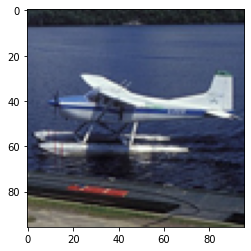

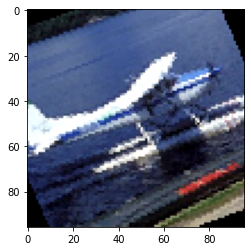

tensor([2.8391e-05, 1.3948e-02, 1.7904e-04, 8.0291e-01, 2.4406e-06, 7.4271e-03,
        8.0959e-05, 1.7442e-01, 2.1734e-07, 1.0047e-03], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.6318e-02, 6.5104e-04, 3.7796e-05, 9.0171e-06, 9.6242e-01, 1.8044e-02,
        9.8937e-04, 9.6797e-04, 4.5246e-04, 1.0810e-04], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▏         | 24/1000 [04:51<3:16:16, 12.07s/it]

epoch 23 finished ======> average loss : -0.8873621389979408


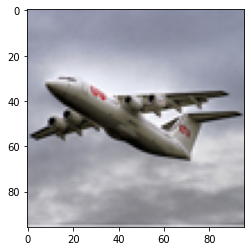

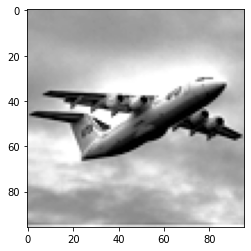

tensor([2.6458e-07, 9.6733e-06, 3.3871e-03, 4.3734e-03, 5.6308e-02, 4.6284e-04,
        6.1984e-04, 1.5047e-04, 9.3403e-01, 6.6330e-04], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([4.6234e-04, 2.2267e-05, 9.2840e-05, 1.9136e-04, 6.5418e-02, 1.2791e-02,
        3.6110e-04, 4.5994e-03, 9.1259e-01, 3.4708e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  2%|▎         | 25/1000 [05:03<3:15:25, 12.03s/it]

epoch 24 finished ======> average loss : -0.9122667797264599


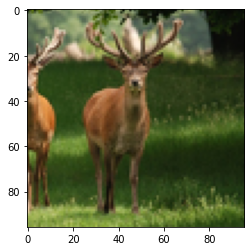

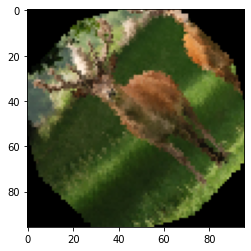

tensor([2.2935e-02, 1.7019e-03, 5.0255e-03, 8.1676e-03, 1.1948e-04, 7.2398e-01,
        4.7792e-02, 1.5884e-01, 2.7444e-02, 4.0026e-03], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([2.5170e-02, 1.3760e-03, 7.4299e-04, 2.1101e-02, 5.9704e-06, 1.5179e-01,
        1.2716e-03, 7.8388e-01, 1.4409e-02, 2.4429e-04], device='cuda:0',
       grad_fn=<SelectBackward>)








  3%|▎         | 26/1000 [05:15<3:15:23, 12.04s/it]

epoch 25 finished ======> average loss : -0.9392661225937662


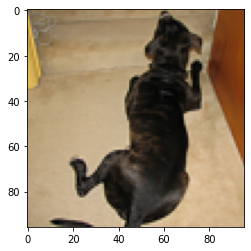

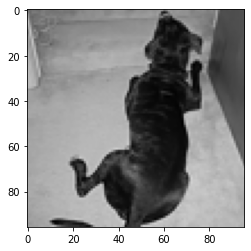

tensor([1.3131e-05, 1.1031e-05, 1.2354e-01, 1.0915e-02, 1.9165e-02, 1.5593e-02,
        5.1312e-03, 3.5019e-05, 8.2560e-01, 1.4087e-07], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.5143e-05, 8.9577e-01, 1.1835e-02, 9.2218e-03, 1.3724e-04, 5.9590e-03,
        4.1748e-02, 3.2273e-02, 4.8556e-04, 2.5526e-03], device='cuda:0',
       grad_fn=<SelectBackward>)








  3%|▎         | 27/1000 [05:27<3:14:47, 12.01s/it]

epoch 26 finished ======> average loss : -0.9525682024302937


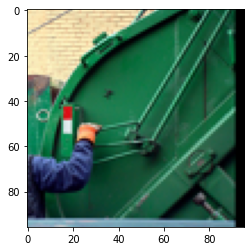

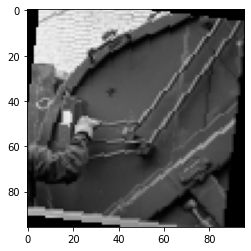

tensor([3.0018e-06, 1.2643e-02, 8.3646e-01, 5.0587e-05, 2.4822e-02, 4.4139e-06,
        1.1080e-03, 9.7318e-05, 9.1235e-03, 1.1568e-01], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.9494e-03, 4.5214e-03, 1.0832e-04, 8.4010e-06, 1.0897e-03, 9.7850e-01,
        1.7284e-06, 3.7192e-03, 9.5756e-03, 5.2626e-04], device='cuda:0',
       grad_fn=<SelectBackward>)








  3%|▎         | 28/1000 [05:39<3:15:24, 12.06s/it]

epoch 27 finished ======> average loss : -0.9673496210149356


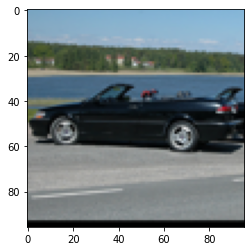

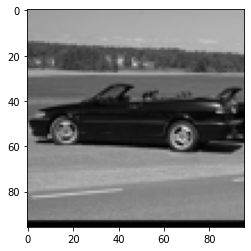

tensor([3.3298e-01, 6.1872e-02, 1.1631e-02, 5.0058e-03, 1.5001e-04, 5.3462e-01,
        3.3638e-03, 4.6129e-02, 4.1965e-03, 5.2251e-05], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([1.1645e-03, 3.6055e-04, 5.6547e-01, 2.5870e-02, 2.6895e-02, 2.8045e-02,
        5.3104e-02, 1.3275e-03, 2.9775e-01, 1.4998e-05], device='cuda:0',
       grad_fn=<SelectBackward>)








  3%|▎         | 29/1000 [05:51<3:14:54, 12.04s/it]

epoch 28 finished ======> average loss : -1.0005877858116514


In [0]:

if torch.cuda.is_available():
  device='cuda'
else:
  device='cpu'
print(device)

net = Net(output_size=10, overcluster_size=50)
net.apply(init_weights)
print(net)

train(net, dataloader, 1000, 1e-6, device)